# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('data/weedprices01012015.csv')

## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [4]:
df['LowQ'] = np.nan
df.head(5)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096


## Graph the top 10 least expensive states for high quality marijuana

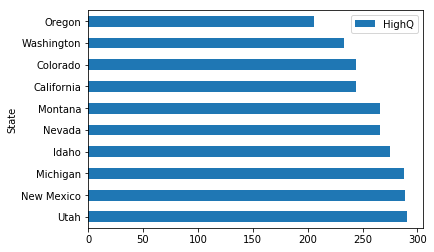

In [5]:
df[['HighQ','State']].sort_values('HighQ',ascending=False).tail(10).plot(y='HighQ',x='State',kind='barh')

## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

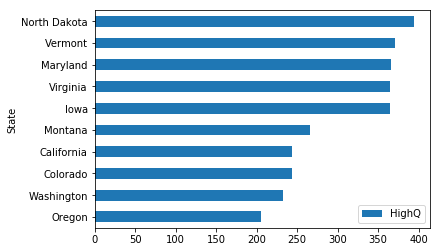

In [6]:
df_highQuality = pd.DataFrame(columns=['State','HighQ'])
df_highQuality = df_highQuality.append(df[['State','HighQ']].sort_values('HighQ').head(5))
df_highQuality = df_highQuality.append(df[['State','HighQ']].sort_values('HighQ').tail(5))
df_highQuality.plot(y='HighQ',x='State',kind='barh')

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

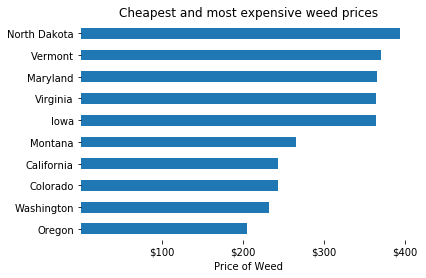

In [7]:
import matplotlib.ticker as ticker
plot = df_highQuality.plot(y='HighQ',x='State',kind='barh')
plot.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))

plot.legend_.remove()
plot.set_xlabel('Price of Weed')
plot.set_ylabel('')
plot.set_title('Cheapest and most expensive weed prices')
plot.set_xticks([100,200,300,400])

for spine in plot.spines.values():
    spine.set_visible(False)

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [8]:
import glob, os
file_names = []
os.chdir('data')
for file in glob.glob("*.csv"):
    file_names.append(file)

len(file_names)

491

## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [9]:
price_dfs = [pd.read_csv(x) for x in file_names]

## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [10]:
price_dfs[0].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,$339.06,1042,$198.64,933,$149.49,123
1,Alaska,$288.75,252,$260.6,297,$388.58,26


In [11]:
price_dfs[-1].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.15,1460,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37


In [12]:
# the files are not identifiable as no date is mentioned in the DataFrame

## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [13]:
for this_df, filename in zip(price_dfs,file_names):
    this_df['filename'] = filename

## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [14]:
combined_df = pd.concat(price_dfs)

In [15]:
combined_df.shape

(24990, 8)

## Pull out the day, month and year from each filename

Do **not** store it back yet!

In [16]:
def date_field(row):
    this_day = row['filename'][10:12]
    this_month = row['filename'][12:14]
    this_year = row['filename'][14:18]
    
    return pd.Series({
        'Day':this_day,
        'Month':this_month,
        'Year':this_year,
        'Date':this_year+"-"+this_month+"-"+this_day
    })

combined_df.apply(date_field,axis=1)

,Date,Day,Month,Year
0,2014-01-01,01,01,2014
1,2014-01-01,01,01,2014
2,2014-01-01,01,01,2014
3,2014-01-01,01,01,2014
4,2014-01-01,01,01,2014
5,2014-01-01,01,01,2014
6,2014-01-01,01,01,2014
7,2014-01-01,01,01,2014
8,2014-01-01,01,01,2014
9,2014-01-01,01,01,2014


## Okay, now add all three columns back at once

You should rename the columns first!

In [17]:
combined_df[['Date','Day','Month','Year']] = combined_df.apply(date_field,axis=1)

## Plot the change in marijuana prices in Oregon over time

In [18]:
combined_df=combined_df.replace('\$','',regex=True)

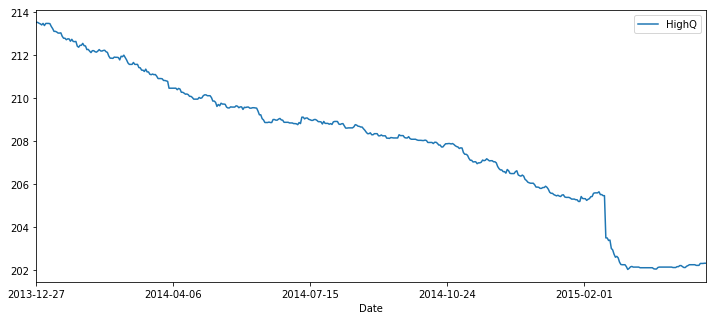

In [19]:
combined_df['HighQ']=combined_df['HighQ'].astype(float)
combined_df[combined_df.State=='Oregon'][['Date','HighQ']].sort_values('Date').plot(x='Date',y='HighQ',figsize = (12,5))

## Plot the change in marijuana prices in all states over time

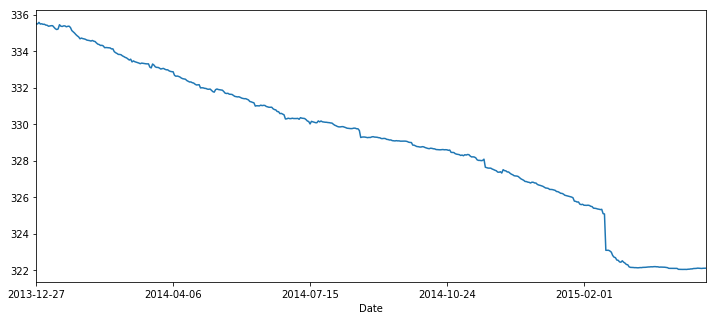

In [23]:
combined_df.groupby('Date')['HighQ'].mean().plot(figsize = (12,5))